# Proyecto
## TEL-354: Minería de Datos 2022-1 
### Prof. Mauricio Araya

## Shootings USA

## Para poder obtener una matriz de correlación ordenada, se redució el espectro de datos y de esta forma poder sacar una conclusión más clara y específica entre todos los datos que presnetaba el dataframe original

In [27]:
import pandas as pd
df_shooting5=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
deep_copy = df_shooting5.copy()
deep_copy.pop('Latitude')
deep_copy.pop('Longitude')
deep_copy.pop('Summary')
deep_copy.pop('Employed at')

deep_copy.pop('Open/Close Location')
deep_copy.pop('Title')
deep_copy.pop('Location')
deep_copy.pop('Incident Area')
deep_copy.pop('Policeman Killed')
deep_copy.pop('Date')
deep_copy.pop('Race')
#deep_copy.pop('Age')
deep_copy = deep_copy.dropna(axis=0)
deep_copy["Age"] = deep_copy["Age"].astype(str).astype(int) 
deep_copy.pop('Target')
deep_copy.pop('S#')
deep_copy

,Cause,Fatalities,Injured,Total victims,Age,Employeed (Y/N),Mental Health Issues,Gender
5,terrorism,3,0,3,24,1.0,Unclear,M
6,unemployement,5,0,5,45,1.0,Unclear,M
155,terrorism,1,6,6,19,1.0,No,Male
156,psycho,3,12,15,34,1.0,Unclear,M
157,psycho,4,16,19,34,1.0,Yes,Male
161,anger,1,3,4,23,0.0,No,Male
163,terrorism,13,3,15,34,1.0,Yes,Male
165,psycho,4,4,8,44,0.0,Unknown,Male
166,psycho,3,3,6,59,0.0,No,Male
171,psycho,5,2,6,64,0.0,No,Male


## En estos markdowns se puede observar información general de el dataframe, las columnas y sus tipos de datos

In [28]:
deep_copy.columns.values

array(['Cause', 'Fatalities', 'Injured', 'Total victims', 'Age',
       'Employeed (Y/N)', 'Mental Health Issues', 'Gender'], dtype=object)

In [29]:
deep_copy.dtypes

Cause                    object
Fatalities                int64
Injured                   int64
Total victims             int64
Age                       int32
Employeed (Y/N)         float64
Mental Health Issues     object
Gender                   object
dtype: object

In [30]:
df_shooting5.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


In [31]:
deep_copy.groupby(['Mental Health Issues']).describe()

Fatalities                                           \
                          count      mean       std  min  25%  50%   75%   
Mental Health Issues                                                       
No                         22.0  4.136364  2.294828  0.0  3.0  4.5  6.00   
Unclear                     4.0  4.250000  1.500000  3.0  3.0  4.0  5.25   
Unknown                     2.0  3.000000  1.414214  2.0  2.5  3.0  3.50   
Yes                        21.0  7.000000  6.268971  1.0  4.0  5.0  7.00   

                           Injured            ...    Age        \
                       max   count      mean  ...    75%   max   
Mental Health Issues                          ...                
No                     7.0    22.0  2.545455  ...  49.50  66.0   
Unclear                6.0     4.0  3.250000  ...  36.75  45.0   
Unknown                4.0     2.0  3.000000  ...  44.75  45.0   
Yes                   24.0    21.0  8.619048  ...  39.00  55.0   

                     Employeed (Y/N)                                      \
                               count      mean       std  min   25%  50%   
Mental Health Issues                                                       
No                              22.0  0.500000  0.511766  0.0  0.00  0.5   
Unclear                          4.0  1.000000  0.000000  1.0  1.00  1.0   
Unknown                          2.0  0.500000  0.707107  0.0  0.25  0.5   
Yes                             21.0  0.380952  0.497613  0.0  0.00  0.0   

                                 
                       75%  max  
Mental Health Issues             
No                    1.00  1.0  
Unclear               1.00  1.0  
Unknown               0.75  1.0  
Yes                   1.00  1.0  

[4 rows x 40 columns]

In [32]:
deep_copy.groupby(['Mental Health Issues']).mean()

,Fatalities,Injured,Total victims,Age,Employeed (Y/N)
Mental Health Issues,,,,,
No,4.136364,2.545455,6.181818,39.227273,0.500000
Unclear,4.250000,3.250000,7.500000,30.750000,1.000000
Unknown,3.000000,3.000000,5.500000,44.500000,0.500000
Yes,7.000000,8.619048,15.095238,33.809524,0.380952


## Se puede observar en la tabla de la media, que en presencia de Problemas de salud mental ("Mental Health Issues"="Yes"), se ve que hay una mayor violencia, debido a que la media de muertes y victimas

## En este momento se crea la matriz de correlación que muestra la siguiente información

In [33]:
df_shooting5_mentalYes=deep_copy[deep_copy['Mental Health Issues']=='Yes']
df_shooting5_mentalNo=deep_copy[deep_copy['Mental Health Issues']=='No']
df_shooting5_mentalUnknown=deep_copy[deep_copy['Mental Health Issues']=='Unknown']
df_shooting5_mentalUnclear=deep_copy[deep_copy['Mental Health Issues']=='Unclear']
shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo])
#shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo,df_shooting5_mentalUnknown,df_shooting5_mentalUnclear])


In [34]:
#Matriz correlación
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr_matrix(data,features=None,annot=True,s=(20,20)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Matriz de Correlación Salud Mental", fontsize = 30)
    plt.show()

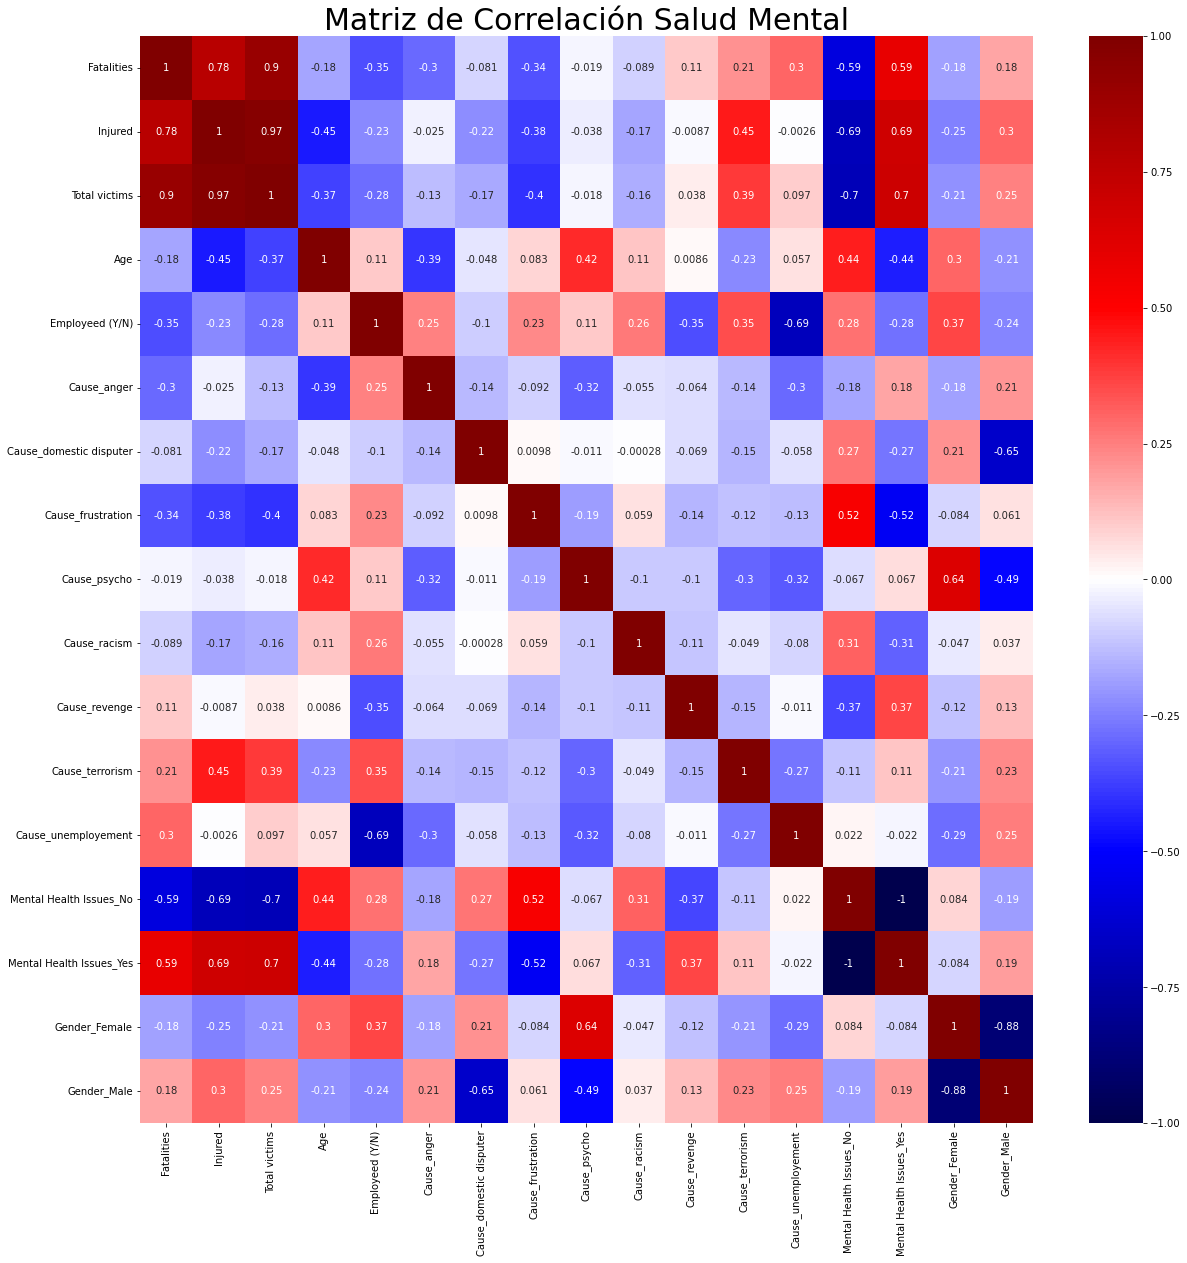

In [35]:
binarios_data_1=pd.get_dummies(shootings)
##############################################
binarios_data_1.pop('Gender_Male/Female')
########################################
correlacion_1=binarios_data_1.corr(method='pearson')
plot_corr_matrix(correlacion_1)

In [36]:
binarios_data_1=pd.get_dummies(shootings)
binarios_copy = binarios_data_1.copy()
binarios_copy.pop('Fatalities')
binarios_copy.pop('Injured')
binarios_copy.pop('Total victims')
binarios_copy.pop('Gender_Male/Female')
correlacion_2=binarios_copy.corr(method='pearson')
#plot_corr_matrix(correlacion_2)

#binarios_data_1

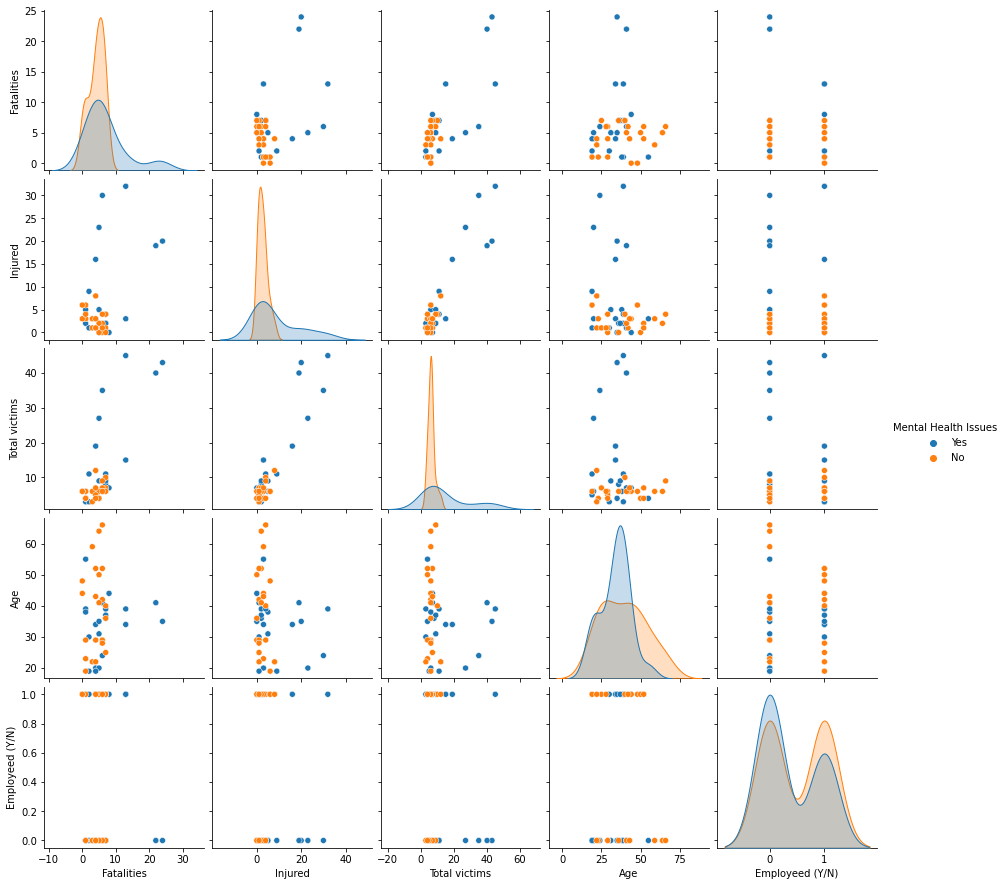

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
#shootings tiene solo los yes y no de mental health
#deep_copy tiene todos los datos
sns.pairplot(shootings, hue="Mental Health Issues")


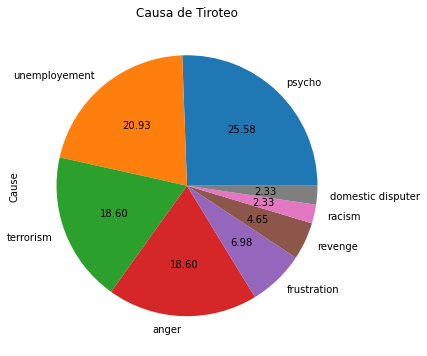

In [38]:
plot = shootings['Cause'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Causa de Tiroteo')

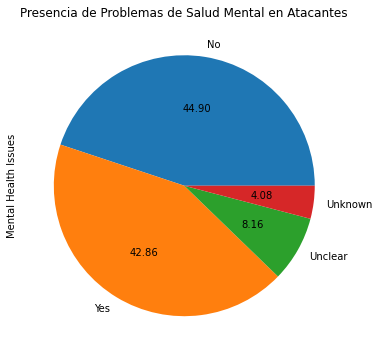

In [39]:
plot = deep_copy['Mental Health Issues'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Presencia de Problemas de Salud Mental en Atacantes')

In [40]:
pd.crosstab(index=deep_copy['Mental Health Issues'],
            columns=deep_copy['Cause'], margins=True)

Cause,anger,domestic disputer,frustration,psycho,racism,revenge,terrorism,unemployement,All
Mental Health Issues,,,,,,,,,
No,3,1,3,5,1,0,4,5,22
Unclear,1,0,0,1,0,0,1,1,4
Unknown,0,0,1,1,0,0,0,0,2
Yes,5,0,0,6,0,2,4,4,21
All,9,1,4,13,1,2,9,10,49


In [41]:

# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=deep_copy['Mental Health Issues'], columns=deep_copy['Cause'],
            margins=True).apply(lambda r: r/len(deep_copy) *100,
                                axis=1)

Cause,anger,domestic disputer,frustration,psycho,racism,revenge,terrorism,unemployement,All
Mental Health Issues,,,,,,,,,
No,6.122449,2.040816,6.122449,10.204082,2.040816,0.000000,8.163265,10.204082,44.897959
Unclear,2.040816,0.000000,0.000000,2.040816,0.000000,0.000000,2.040816,2.040816,8.163265
Unknown,0.000000,0.000000,2.040816,2.040816,0.000000,0.000000,0.000000,0.000000,4.081633
Yes,10.204082,0.000000,0.000000,12.244898,0.000000,4.081633,8.163265,8.163265,42.857143
All,18.367347,2.040816,8.163265,26.530612,2.040816,4.081633,18.367347,20.408163,100.000000


In [42]:
# tabla de contingencia en porcentajes relativos segun salud mental
pd.crosstab(index=deep_copy['Mental Health Issues'], columns=deep_copy['Cause']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Cause,anger,domestic disputer,frustration,psycho,racism,revenge,terrorism,unemployement
Mental Health Issues,,,,,,,,
No,13.636364,4.545455,13.636364,22.727273,4.545455,0.00000,18.181818,22.727273
Unclear,25.000000,0.000000,0.000000,25.000000,0.000000,0.00000,25.000000,25.000000
Unknown,0.000000,0.000000,50.000000,50.000000,0.000000,0.00000,0.000000,0.000000
Yes,23.809524,0.000000,0.000000,28.571429,0.000000,9.52381,19.047619,19.047619


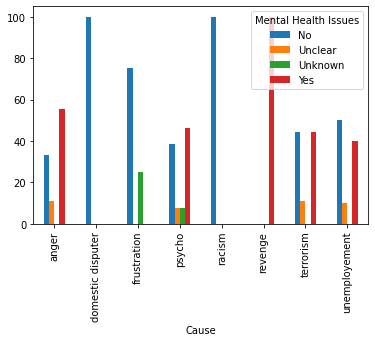

In [43]:

# Gráfico de barras de salud mental segun causa
plot = pd.crosstab(index=deep_copy['Cause'],
            columns=deep_copy['Mental Health Issues']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

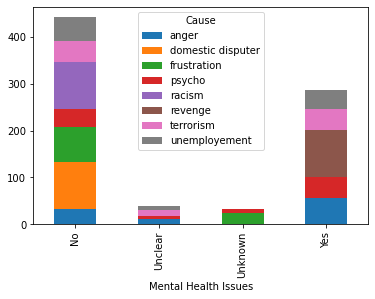

In [44]:

# Gráfico de barras de salud mental segun causa
plot = pd.crosstab(index=deep_copy['Mental Health Issues'],
            columns=deep_copy['Cause']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [45]:

# Scatterplot arguments
#sns.lmplot(x='Attack', y='Defense', data=df,
#           fit_reg=False, # No regression line
#           hue='Mental Health Issues')

In [46]:
import pandas as pd
data=pd.read_csv('Libro1.csv')

In [47]:
#data

In [48]:
import seaborn as sns
#sns.pairplot(data,hue='State number')
#data.plot.scatter('Total Guns Registered Per Capita','Gun Violence Incidents',c='State number',cmap='inferno') #'seismic','viridis'

<AxesSubplot:xlabel='Total Guns Registered', ylabel='GunViolence Incidents by State'>

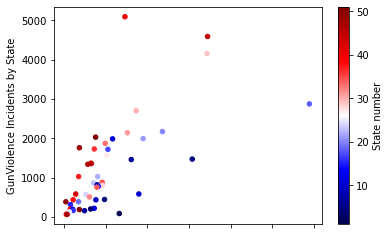

In [49]:
#año 2017 ARMAS REGISTRADAS VS TIROTEOS
data_2=pd.read_csv('armas_tiroteos.csv')
#data_2
data_2.plot.scatter('Total Guns Registered','GunViolence Incidents by State',c='State number',cmap='seismic')

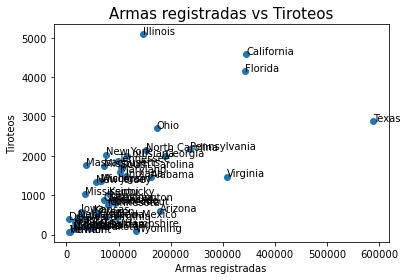

<Figure size 2160x2160 with 0 Axes>

In [50]:
#ARMAS REGISTRADAS
plt.scatter(data_2['Total Guns Registered'],data_2['GunViolence Incidents by State'])

for i in data_2['State'].keys():
    iso= data_2['State'][i]
    plt.annotate(iso, ( data_2['Total Guns Registered'][i],data_2['GunViolence Incidents by State'][i]))

plt.title("Armas registradas vs Tiroteos",fontsize=15)
plt.xlabel("Armas registradas",fontsize=10)
plt.ylabel("Tiroteos",fontsize=10)
#plt.legend()
#plt.figure(figsize=(8,6))
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)

<AxesSubplot:xlabel='Total Gun Laws', ylabel='Gun Violence Incidents'>

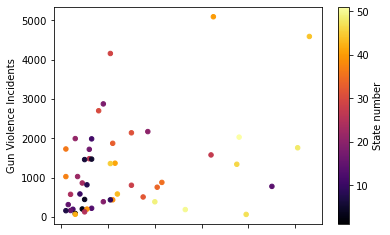

In [51]:
#año 2017
#LEYES

data_3=pd.read_csv('leyes_tiroteos.csv')
data_3.plot.scatter('Total Gun Laws','Gun Violence Incidents',c='State number',cmap='inferno')


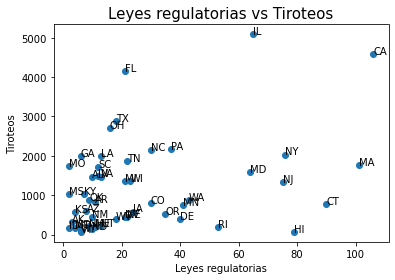

<Figure size 2160x2160 with 0 Axes>

In [52]:
#LEYES
plt.scatter(data_3['Total Gun Laws'],data_3['Gun Violence Incidents'])

for i in data_3['Sigla State'].keys():
    iso= data_3['Sigla State'][i]
    plt.annotate(iso, ( data_3['Total Gun Laws'][i],data_3['Gun Violence Incidents'][i]))

plt.title("Leyes regulatorias vs Tiroteos",fontsize=15)
plt.xlabel("Leyes regulatorias",fontsize=10)
plt.ylabel("Tiroteos",fontsize=10)
#plt.legend()
#plt.figure(figsize=(8,6))
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)

In [35]:
###Ver como relacionar la salud mental
##'Mass_shooting_data.csv' no tiene salud mental
import pandas as pd
df_shooting1=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
df_shooting1=df_shooting1.dropna(axis=0)
#df_shooting1['Location'] = df_shooting1['Location'].astype(str)
df_shooting1['Location'] = df_shooting1['Location'].str.split(',')
df_shooting1.Location[4][1]
df_shooting1.dtypes


#>>> cadena = "www.eugeniabahit.com" 
#>>> print cadena.lstrip("w." )
#eugeniabahit.com

#>>> cadena = "       www.eugeniabahit.com" 
#>>> print cadena.lstrip()
#www.eugeniabahit.com


#for column in df_shooting1['Location']:
#    print('Nombre de la fila 1: ', column)
    #dato=column.astype(str)
    #column=dato
    #column.lstrip(",")
    #print('Contenido de la columna: ', df_shooting1[column])
for column in df_shooting1['Location']:
    print('Nombre de la fila 2: ', column)


KeyError: 4